Here I am just trying to filter the datacube to only get the blue band 

In [9]:
# Import required packages
import openeo
from openeo.processes import process

# Connect to the back-end
connection = openeo.connect("https://openeo.cloud").authenticate_oidc()

Authenticated using refresh token.


In [10]:
load1 = connection.load_collection(collection_id = "SENTINEL2_L2A_SENTINELHUB", bands = ["B04", "B03", "B02","B08"], spatial_extent = {"east": 8.961145817369813,
          "north": 44.4366991352135,
          "south": 44.373626699814,
          "west": 8.837940236377976}, 
                                   temporal_extent = ["2022-11-01T00:00:00Z", "2022-11-10T00:00:00Z"] )

In [17]:
from models import *
from UDF_detector import *
from openeo.udf.debug import inspect

udf = """
from openeo.udf import XarrayDataCube

def apply_datacube(cube: XarrayDataCube, context: dict) -> XarrayDataCube:
    data = cube.get_array()
    
    # Initialize empty NumPy arrays for each band
    blue = None
    blue = data.sel(bands = "B02")

    return XarrayDataCube(blue)
"""



In [18]:
udf = openeo.UDF(udf)

In [19]:

ships = load1.apply_dimension(process = udf, dimension ="bands")


In [20]:
%time job = ships.execute_batch(title="S2 bands of Genoa", description="Required bands for ship detection", out_format="Gtiff")

0:00:00 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': send 'start'
0:00:20 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:00:25 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:00:32 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:00:40 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:00:50 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:01:03 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:01:20 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:01:40 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:02:04 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:02:34 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': queued (progress N/A)
0:03:12 Job 'vito-j-fb3d66a3ea6146ec9cd892088ab346fe': finished (progress N/A)
CPU times: user 95 ms, sys: 516 µs, total: 95.6 ms
Wall time: 3min 14s


In [35]:
results = job.get_results()
results.download_files("test")

[PosixPath('test/openEO_2022-11-02Z.tif'), PosixPath('test/job-results.json')]

RUNNING THE INFERENCE ON DATA STORED IN A FOLDER

All bands loaded successfully.
Raw shape of the dataset was (1126, 1351, 6)
New shape is (1088, 1344)
357/357 [===========================]


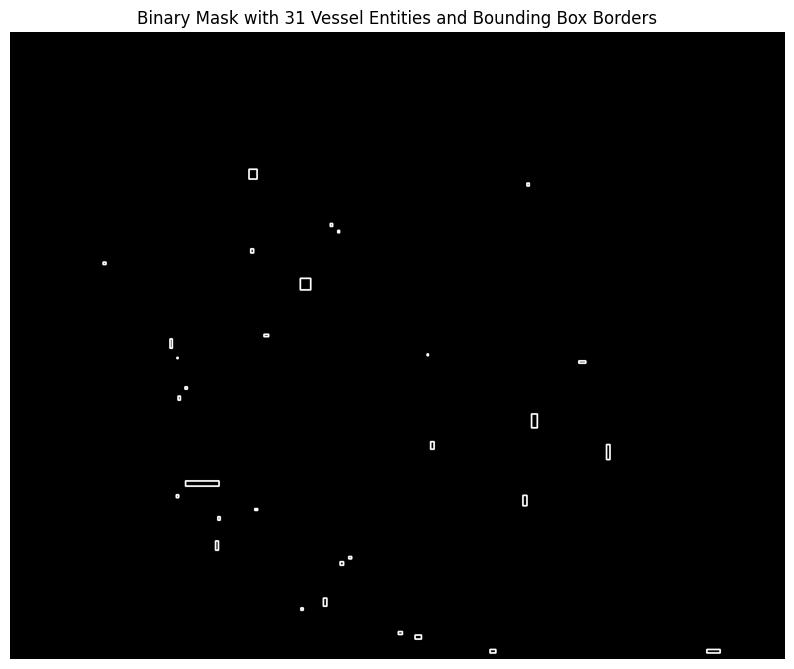

Number of Vessel Entities: 31


In [8]:
from UDF_detector import *

dataset_folder = 'validation_data/'

threshold = 0.5
ship_detector(dataset_folder,threshold, file_format="gtiff")

Raw shape of the dataset was (703, 983, 6)
New shape is (640, 960)
150/150 [===========================]


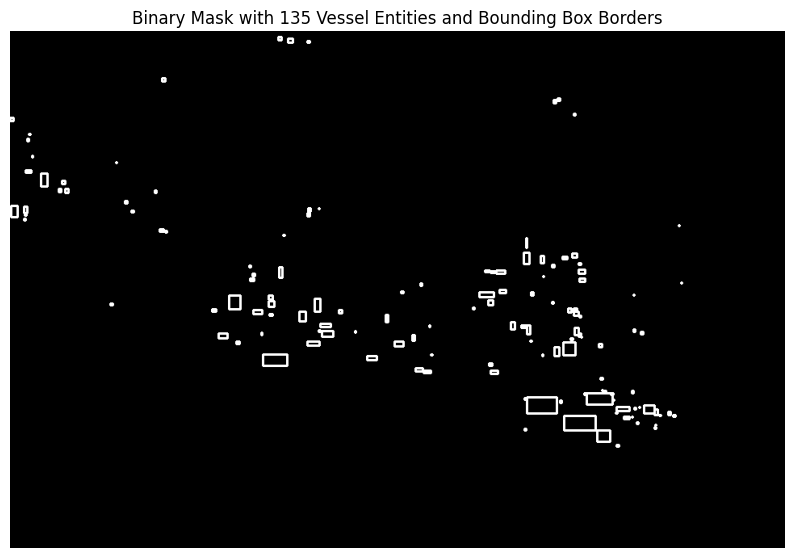

Number of Vessel Entities: 135


In [7]:
from UDF_detector import *

dataset_folder = 'validation_data/openEO.nc'

threshold = 0.5
ship_detector(dataset_folder,threshold, file_format="netcdf")